# Data Boot-Camp Final Project 
 
## American Time Use Study (ATUS) 
 
### Sravya Boddu (sb5933), Sonal Jadwani (sj2280), Vineetha Kutty (vkk242) | May 5th, 2017
 
<img src="http://marketingland.com/wp-content/ml-loads/2014/05/speed-to-market-600x300.jpg" alt="Drawing" style="width: 1000px;"/>


# Introduction

In this project, our aim is to thoroughly analyse the American Time Use Study (ATUS) data which primarily measures the amount of time Americans spend doing various activities such as personal work, paid work, and other daily duties. Nationally represented estimates of the time spent are processed to draw effective insights which will assist in further comprehending product business cycle, marketing, and in developing successful targeting strategy.

With the help of Python and its extensive libraries, we then visualized the processed data to grasp the trends more clearly and consequently obtain valuable insights.

# Contents

1. Background
2. About the Data
    + 2.1 | Data Sources
    + 2.2 | Python Libraries
    + 2.3 | Dataframes
3. Data Fetching, Cleaning, and Processing
    + 3.1 | Fetching and Slicing Data 
        + 3.1.1 | User-defined Functions 'Extract_Main' / 'Extract_Sub' for Gender level Activity data
        + 3.1.2 | Leisure Activity Data
        + 3.1.3 | Age Level Activity Data
        + 3.1.4 | Geography Level Activity Data 
    + 3.2 | Cleaning and Organizing Data
4. Visualizing the Data
    + 4.1 | Visualizing the time spent on main activities at gender level
    + 4.2 | Visualizing trends for main activities through years 2011 - 2015
    + 4.3 | Which activity is the primary focus for each gender?
    + 4.4 | Does age play any role in the time spent on activities?
    + 4.5 | Deep-Diving and visualizing data at sub-activity level for the top 4 main activities
    + 4.6 | Leisure Activity Breakdown
    + 4.7 | Visualizing time spent on Sports & Leisure activities at a geographic level
    + 4.8 | Ad-Hoc Analysis: Time spent on Organizational, Civic, and Religious activities activities at a geographic level
5. Conclusion

# 1 | Background

The American Time Use Study (ATUS) is sponsored by the Bureau of Labor Statistics (BLS) and is conducted by the United States Census Bureau. It's main goal is to record the amount of time spent by Americans on numeorus activities ranging from work to leisure to childcare and house-hold activities. This data is further classified based on gender, age group, employment status, marital status, and geographic location. 

Participants are usually households which have completed all eight months of the Current Population Survey (CPS). Amongst this pool of participants, households are further categorized based on numerous demographic characteristics and then they are finally selected to participate in the survey. Any particular individual above the age of 15 in the household is called up and questioned regarding their time use. 

This data is utilized for many purposes by organizations such as Bureau of Economic Analysis (BEA), Bureau of Transportation Statistics (BTS) and the Economic Research Service (ERS). It has also been employed to understand worker productivity, effective promotion and targeting strategies and to deep dive into work-life balance ideology.

# 2 | About the Data

The data has been obtained from the Bureau of Labor Statistics - ATUS website. 

As mentioned above, ATUS provides nationally representative estimates of the time spent by Americans. It is the only federal survey providing data on the full range of non-market activities, from childcare to volunteering.

The data is usually collected from over 170,000 interviews and we have focused on data spanning from 2011 - 2015 to maintain relevance.

Main focus activities are: 

+ Personal Care Activities
+ Eating and Drinking
+ Household Activities
+ Purchasing goods and services
+ Caring for and helping household members
+ Caring for and helping non-household members
+ Working and Work related activities
+ Educational Activities
+ Organizational, civic, and religious activities
+ Leisure and Sports
+ Telephone calls, mail, and email      

## 2.1 | Data Sources

**Website**                  : Bureau of Labor Statistics

**Historical Data Span**     : 2011 – 2015

**Data Sources URLs :**
+ Activity Level Data        : https://www.bls.gov/tus/a1_all_years.xlsx
+ Leisure Activity Data      : https://www.bls.gov/tus/charts/chart9.txt
+ Students Activity Data     : https://www.bls.gov/tus/charts/chart6.txt
+ Elders Activity Data       : https://www.bls.gov/tus/charts/chart4.txt
+ Geography Level Data       : Obtained from ATUS on request - This data has been uploaded in the Dropbox
    + Sports Data            : https://www.dropbox.com/s/c5ahh0ffb7tc3yv/ATUS_Geography_Data_Sports.csv?dl=1
    + Organizational, Civic, and Religious Data :        https://www.dropbox.com/s/36gnok6gtn3u5gw/ATUS_Geography_Data_Religion.csv?dl=1
    
**Data Dictionaries**        : https://www.bls.gov/tus/dictionaries.htm

**User Guide**               : https://www.bls.gov/tus/atususersguide.pdf

## 2.2 | Python Libraries

We employed os and requests libraries for importing the data. We then used the pandas library to manipulate and display selected data. Finally, we worked with matplotlib, plotly, and other graphic libraries for visualization. 

In [69]:
# Importing all the required libraries

%matplotlib inline 

import sys
import pandas as pd                 # data manipulation package
import datetime as dt               # date tools, used to note current date  
import matplotlib.pyplot as plt     # graphics package
import matplotlib as mpl            # graphics package
import plotly as pl                 # graphics package
import urllib.request               # To import data from Dropbox

# New Libraries

import os                          # operating system tools (check files)
import requests, io                # internet and input tools  
import zipfile as zf               # zip file tools 
import shutil                      # file management tools 
import numpy as np                 # scientific computing

# Geographical Views (Plotly Authentication)

import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('Vinee03', '0hNA8NplYEePfVAdDtUa')

# System Details

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.19.2
Today:  2017-05-05


In [70]:
# To maintain color uniformity throughout all of the visualizations

colors = {1: "royalblue",
          2: "bisque",
          3: "navy",
          4: "silver",
          5: "darkmagenta",
          6: "pink",
          7: "chocolate",
          8: "orangered",
          9: "lime",
          10:"orange",
          11:"darkorchid",
          12:"black",
          13:"yellow"}           

## 2.3 | Dataframes

+ The above mentioned excel workbook comprises of multiple tabs with each tab having data for one particular year (spanning from 2003 to 2015)

+ There are two types of Activities: 
    + Main Activity (For example: Leisure & Sports, Educational Activities)
    + Sub-Activity (For example: Watching TV, Participating in Sports, Attending Class)
    
+ The sub-activity hours add up to the main activity hours

+ To check the trends at both main activity and sub-activity level, two dataframes have been created for the entire time span i.e. from 2011 to 2015
    + **Main Activity Dataframe** : df_main_final
    + **Sub-Activity Dataframe**  : df_sub_final
    
+ **Leisure Activity Dataframe**  : df_leisure_all

+ **Consolidated Age Group Activity Dataframe**: df_age_data 
    + Students Activity Dataframe : df_students
    + Elders Activity Dataframe   : df_elderly
    
+ **Geographical Distribution Dataframe**
    + Sports Data Dataframe   : df_geo_sports
    + Organizational, Civic, and Religious Data Dataframe : df_geo_religion

# 3 | Data Fetching, Cleaning, and Processing
## 3.1 | Fetching and Slicing Data 
## 3.1.1 | User-defined Functions 'Extract_Main' / 'Extract_Sub' for Gender level activity data

+ Dataframe creation process by employing user-defined functions:
    + Fetched the Excel workbook from the ATUS Website
    + Read individual tabs within the Excel workbook into separate dataframes for each year
    + Filtered out the activities into Main and Sub-Activities
    + Merged all of the dataframes for each year based on the primary index (Activity)
    + Created two final dataframes for Main and Sub-Activities
    
+ Note: 
    + 'extract_main' function dynamically creates 5 dataframes for Main activities for each year (2011 to 2015)
    + Merge all dataframes into a single dataframe 'df_main_final'
    + Similarly, 'extract_sub' function dynamically creates 5 dataframes for sub-activities for each year (2011 to 2015)
    + Merge all dataframes into a single dataframe 'df_sub_final'

In [71]:
# Fetching data from ATUS Website 

dls = "https://www.bls.gov/tus/a1_all_years.xlsx"
resp = requests.get(dls)
with open('a1_all_years.xlsx', 'wb') as output:
    c = output.write(resp.content)
    
# Creating a dictionary of dataframes for each year of analysis

df_names = ['df_2011','df_2012','df_2013','df_2014','df_2015']

# Defining a function to extract main activity data for each year ranging from 2011 to 2015

def extract_main(no_of_years):
    i= 0
    year = 2011 
    year_max = year + no_of_years
    while year < year_max: 
        year = str(year)
        df = pd.read_excel(open('a1_all_years.xlsx','rb'), sheetname= year, header= None)
        df_extract = df.loc[[5,11,14,25,37,46,52,58,62,73,85,91],[0,8,9]]    
        df_names[i] = df_extract
        df_names[i].columns = ['Main_Activity', 'AvgHrsMen_'+ year, 'AvgHrsWomen_' + year]
        df_names[i] = df_names[i].set_index(['Main_Activity'])
        year = int(year)
        year=year+1
        i = i+1
                
extract_main(5)

# Merging the year-level dataframes to obtain a consolidated main activity dataframe

df_main_final = pd.concat([df_names[0],df_names[1],df_names[2],df_names[3],df_names[4]], axis = 1)
df_main_final

,AvgHrsMen_2011,AvgHrsWomen_2011,AvgHrsMen_2012,AvgHrsWomen_2012,AvgHrsMen_2013,AvgHrsWomen_2013,AvgHrsMen_2014,AvgHrsWomen_2014,AvgHrsMen_2015,AvgHrsWomen_2015
Main_Activity,,,,,,,,,,
Personal care activities,9.24787,9.72544,9.22,9.74,9.31,9.76,9.33,9.82,9.44,9.85
Eating and drinking,1.31976,1.26565,1.35,1.25,1.31,1.24,1.27,1.19,1.3,1.19
Household activities,2.10548,2.61514,1.99,2.63,2.06,2.63,2.11,2.57,2.13,2.61
Purchasing goods and services,1.60635,1.76796,1.6,1.85,1.62,1.83,1.54,1.84,1.5,1.86
Caring for and helping household members,1.69932,2.31443,1.79,2.27,1.75,2.28,1.7,2.35,1.61,2.32
Caring for and helping nonhousehold members,1.74568,1.79674,1.59,1.64,1.69,1.68,1.74,1.66,1.68,1.65
Working and work-related activities,8.38966,7.51521,8.54,7.49,8.45,7.46,8.6,7.64,8.4,7.58
Educational activities,5.82951,5.47719,6.01,5.73,6.25,5.74,5.35,5.21,6.26,5.39
"Organizational, civic, and religious activities",2.59151,2.49212,2.42,2.27,2.52,2.17,2.36,2.17,2.28,2.2


In [72]:
# Fetching data from ATUS Website

dls = "https://www.bls.gov/tus/a1_all_years.xlsx"
resp = requests.get(dls)
with open('a1_all_years.xlsx', 'wb') as output:
    c = output.write(resp.content)

# Creating a dictionary of dataframes for each year of analysis

df_names = ['df_2011','df_2012','df_2013','df_2014','df_2015']

# Defining a function to extract sub-activity data for each year ranging from 2011 to 2015

def extract_sub(no_of_years):
    i= 0
    year = 2011 
    year_max = year + no_of_years
    while year < year_max: 
        year = str(year)
        df = pd.read_excel(open('a1_all_years.xlsx','rb'), sheetname= year, header= None)
        df_extract = df.loc[[6,7,8,9,10,12,13,15,16,17,18,19,20,21,22,23,24,26,28,32,35,38,42,45,47,48,51,53,54,55,56,57,59,60,61,
                            63,64,72,74,81,84,86,87,90],[0,8,9]]    
        df_names[i] = df_extract
        df_names[i].columns = ['Sub_Activity', 'AvgHrsMen_'+ year, 'AvgHrsWomen_' + year]
        df_names[i] = df_names[i].set_index(['Sub_Activity'])
        year = int(year)
        year=year+1
        i = i+1
                
extract_sub(5)

# Merging the year-level dataframes to obtain a consolidated sub-activity dataframe

df_sub_final = pd.concat([df_names[0],df_names[1],df_names[2],df_names[3],df_names[4]], axis = 1)
df_sub_final

,AvgHrsMen_2011,AvgHrsWomen_2011,AvgHrsMen_2012,AvgHrsWomen_2012,AvgHrsMen_2013,AvgHrsWomen_2013,AvgHrsMen_2014,AvgHrsWomen_2014,AvgHrsMen_2015,AvgHrsWomen_2015
Sub_Activity,,,,,,,,,,
Sleeping,8.62654,8.80995,8.61,8.86,8.66,8.82,8.7,8.9,8.78,8.9
Grooming,0.735707,0.989604,0.74,0.96,0.74,0.98,0.71,0.96,0.72,0.96
Health-related self care,0.949821,1.1642,1.01,1.27,1.27,1.46,1.04,1.25,1.16,1.53
Personal activities,1.24722,1.34286,1.12,1.48,1.44,(2),1.21,1.42,1.55,0.91
Travel related to personal care,0.88379,0.823941,0.67,0.73,0.73,0.62,0.64,0.64,0.56,0.52
Eating and drinking,1.19479,1.14607,1.21,1.13,1.18,1.13,1.16,1.09,1.17,1.08
Travel related to eating and drinking,0.472364,0.523315,0.55,0.49,0.49,0.48,0.44,0.44,0.49,0.47
Housework,1.42858,1.81811,1.4,1.86,1.3,1.8,1.35,1.68,1.23,1.71
Food preparation and cleanup,0.763473,1.2021,0.72,1.16,0.8,1.17,0.79,1.19,0.82,1.19


## 3.1.2 | Leisure Activity Data

+ Fetched data from BLS website to further understand what leisure activities are most popular among Americans
+ Cleaned the text file in order to accommodate the missing and multiple delimiters
+ Handled the gap with numeric data to ensure data consistency

In [73]:
# Fetching Data for Leisure activity (will be used further down in the analysis)

dls = "https://www.bls.gov/tus/charts/chart9.txt"
resp = requests.get(dls)
with open('chart9.txt', 'wb') as output:
    c = output.write(resp.content)
    
# Extracting the text file data

lines = open("chart9.txt").readlines()
open('newfile.txt', 'w').writelines(lines[2:-4])
f_leisure = open("newfile.txt","r")
data_leisure = f_leisure.read()

# Replace the target string to fix the delimiters

data_leisure = data_leisure.replace("\t", '|').replace("||||", '|').replace("|||", '|').replace("||", '|')

# Write the file out again

with open('newfile.txt', 'w') as file:
    file.write(data_leisure)

f_leisure = open("newfile.txt","r")
data_leisure = f_leisure.read()

# Extracting/Cleaning the data and renaming certain columns

df_leisure_all = pd.read_csv(open("newfile.txt","r"), delimiter="|")
df_leisure_all = df_leisure_all.rename(columns={'Unnamed: 0': 'Activity_Leisure_SubActivity'})
df_leisure_all = df_leisure_all.drop(df_leisure_all.index[[7]])
df_leisure_all.iloc[0, df_leisure_all.columns.get_loc('Minutes')] = 167
df_leisure_all
df_leisure_all = df_leisure_all.set_index(['Activity_Leisure_SubActivity'])

df_leisure_all= df_leisure_all.astype(float)
df_leisure_all

,Minutes
Activity_Leisure_SubActivity,
Watching TV,167.0
Socializing and communicating,41.0
Playing games; using computer for leisure,25.0
Reading,19.0
"Sports, exercise, and recreation",18.0
Relaxing and thinking,17.0
Other leisure activities,12.0


## 3.1.3 | Age Level Activity Data

+ Fetched data from BLS website to further understand the time indulged in activities based on Age
+ Age Brackets considered are:
    + Ages 15-49
    + Ages 55-64
    + Ages 65-74
    + Ages 75 + 
+ Cleaned the text file in order to accommodate the missing and multiple delimiters
+ Handled the gap with numeric data to ensure data consistency

In [74]:
# Fetching Students Data (will be used further down in the analysis)

dls = "https://www.bls.gov/tus/charts/chart6.txt"
resp = requests.get(dls)
with open('chart6.txt', 'wb') as output:
    c = output.write(resp.content)
    
# Extracting the text file data

lines = open("chart6.txt").readlines()
open('newfile.txt', 'w').writelines(lines[1:-5])
f_s = open("newfile.txt","r")
data_s = f_s.read()

# Replace the target string to fix the delimiters

data_s = data_s.replace("\t", '|').replace("||||", '|').replace("|||", '|').replace("||", '|').replace("activities", 'Working').replace("Educational Working", 'Household/Educational Activities')

# Write the file out again

with open('newfile.txt', 'w') as file:
    file.write(data_s)

f_s = open("newfile.txt","r")
data_s = f_s.read()

# Extracting the data and renaming certain columns

df_students = pd.read_csv(open("newfile.txt","r"), delimiter="|")
df_students = df_students.drop(df_students.index[[3,9,5,6,7,8]])
df_students = df_students.rename(columns={'Unnamed: 0': 'Main_Activity', 'Hours': 'Ages 15-49'})
df_students['Main_Activity'] = df_students['Main_Activity'].str.strip()
df_students = df_students.set_index(['Main_Activity'])
df_students

,Ages 15-49
Main_Activity,
Sleeping,8.8
Leisure and sports,4.0
Household/Educational Activities,3.5
Working,2.3


In [75]:
# Fetching Elders Data (will be used further down in the analysis)

dls = "https://www.bls.gov/tus/charts/chart4.txt"
resp = requests.get(dls)
with open('chart4.txt', 'wb') as output:
    c = output.write(resp.content)
    
# Extracting the text file data

lines = open("chart4.txt").readlines()
open('newfile.txt', 'w').writelines(lines[4:-4])
f_e = open("newfile.txt","r")
data_e = f_e.read()

# Replace the target string to fix the delimiters

data_e = data_e.replace("\t", '|').replace("||||", '|').replace("|||", '|').replace("||", '|').replace("Household activities", 'Household/Educational Activities')

# Write the file out again

with open('newfile.txt', 'w') as file:
    file.write(data_e)

f_e = open("newfile.txt","r")
data_e = f_e.read()

# Extracting the data and renaming certain columns

df_elderly = pd.read_csv(open("newfile.txt","r"), delimiter="|")
df_elderly.drop('Unnamed: 4', axis = 1, inplace = True)
df_elderly = df_elderly.rename(columns={'Unnamed: 0': 'Main_Activity'})
df_elderly['Main_Activity'] = df_elderly['Main_Activity'].str.strip()
df_elderly = df_elderly.set_index(['Main_Activity'])
df_elderly

,Ages 55-64,Ages 65-74,Ages 75+
Main_Activity,,,
Working,3.5,1.2,0.3
Household/Educational Activities,2.0,2.4,2.3
Leisure and sports,5.4,6.8,7.5
Sleeping,8.5,8.8,9.2


## 3.1.4 | Geography Level Activity Data

+ Obtained the Geography level data upon request from ATUS
+ Geography data considered are:
    + Sports data
    + Religion data
+ Included the state code in order to easily visualize the data

In [76]:
# Extracting Geographical Distribution of Sports Data from Dropbox

url = "https://www.dropbox.com/s/c5ahh0ffb7tc3yv/ATUS_Geography_Data_Sports.csv?dl=1"
u_s = urllib.request.urlopen(url)
data_s = u_s.read()
u_s.close()

with open("ATUS_Geography_Data_Sports.csv", "wb") as f :
    f.write(data_s)

df_geo_sports = pd.read_csv(open("ATUS_Geography_Data_Sports.csv","r"),delimiter=",")
df_geo_sports

,code,State,Hours
0,AL,Alabama,0.28
1,AK,Alaska,0.61
2,AZ,Arizona,0.33
3,AR,Arkansas,0.26
4,CA,California,0.38
5,CO,Colorado,0.41
6,CT,Connecticut,0.31
7,DE,Delaware,0.16
8,DC,District of Columbia,0.28
9,FL,Florida,0.32


In [77]:
# Extracting Geographical distribution of Organizational, Civic, and Religious Data from Dropbox

url = "https://www.dropbox.com/s/36gnok6gtn3u5gw/ATUS_Geography_Data_Religion.csv?dl=1"
u_r = urllib.request.urlopen(url)
data_r = u_r.read()
u_r.close()

with open("ATUS_Geography_Data_Religion.csv", "wb") as f :
    f.write(data_r)

df_geo_religion = pd.read_csv(open("ATUS_Geography_Data_Religion.csv","r"),delimiter=",")
df_geo_religion

,code,State,Hours
0,AL,Alabama,0.36
1,AK,Alaska,0.00
2,AZ,Arizona,0.28
3,AR,Arkansas,0.30
4,CA,California,0.26
5,CO,Colorado,0.23
6,CT,Connecticut,0.28
7,DE,Delaware,0.25
8,DC,District of Columbia,0.23
9,FL,Florida,0.28


## 3.2 | Cleaning and Organizing Data

+ Cleaned the Activity data to ensure no outliers are present i.e. negative values, consistent decimal places, substitution of missing values
+ Feature engineered additional data fields to observe distinct trends
+ Merged multiple datasets in order to obtain a well-rounded view

In [78]:
# Cleaning the data and computing average time spent on activities at gender level

# Main Activity

df_main_final= df_main_final.apply(pd.to_numeric, errors='ignore')
df_main_final["AvgHrsMenMain"]= df_main_final[['AvgHrsMen_2011','AvgHrsMen_2012','AvgHrsMen_2013','AvgHrsMen_2014','AvgHrsMen_2015']].mean(axis = 1)
df_main_final["AvgHrsWomenMain"]= df_main_final[['AvgHrsWomen_2011','AvgHrsWomen_2012','AvgHrsWomen_2013','AvgHrsWomen_2014','AvgHrsWomen_2015']].mean(axis =1)
df_main_final = df_main_final.round(2)
df_main_final

,AvgHrsMen_2011,AvgHrsWomen_2011,AvgHrsMen_2012,AvgHrsWomen_2012,AvgHrsMen_2013,AvgHrsWomen_2013,AvgHrsMen_2014,AvgHrsWomen_2014,AvgHrsMen_2015,AvgHrsWomen_2015,AvgHrsMenMain,AvgHrsWomenMain
Main_Activity,,,,,,,,,,,,
Personal care activities,9.25,9.73,9.22,9.74,9.31,9.76,9.33,9.82,9.44,9.85,9.31,9.78
Eating and drinking,1.32,1.27,1.35,1.25,1.31,1.24,1.27,1.19,1.30,1.19,1.31,1.23
Household activities,2.11,2.62,1.99,2.63,2.06,2.63,2.11,2.57,2.13,2.61,2.08,2.61
Purchasing goods and services,1.61,1.77,1.60,1.85,1.62,1.83,1.54,1.84,1.50,1.86,1.57,1.83
Caring for and helping household members,1.70,2.31,1.79,2.27,1.75,2.28,1.70,2.35,1.61,2.32,1.71,2.31
Caring for and helping nonhousehold members,1.75,1.80,1.59,1.64,1.69,1.68,1.74,1.66,1.68,1.65,1.69,1.69
Working and work-related activities,8.39,7.52,8.54,7.49,8.45,7.46,8.60,7.64,8.40,7.58,8.48,7.54
Educational activities,5.83,5.48,6.01,5.73,6.25,5.74,5.35,5.21,6.26,5.39,5.94,5.51
"Organizational, civic, and religious activities",2.59,2.49,2.42,2.27,2.52,2.17,2.36,2.17,2.28,2.20,2.43,2.26


In [79]:
# Cleaning the data and computing average time spent on activities at gender level

# Sub-Activity

df_sub_final=df_sub_final.replace('\(','',regex=True).replace('\)','',regex=True)   
df_sub_final= df_sub_final.apply(pd.to_numeric, errors='ignore')
df_sub_final["AvgHrsMenSub"]=df_sub_final[['AvgHrsMen_2011','AvgHrsMen_2012','AvgHrsMen_2013','AvgHrsMen_2014','AvgHrsMen_2015']].mean(axis =1)
df_sub_final["AvgHrsWomenSub"]=df_sub_final[['AvgHrsWomen_2011','AvgHrsWomen_2012','AvgHrsWomen_2013','AvgHrsWomen_2014','AvgHrsWomen_2015']].mean(axis =1)
df_sub_final = df_sub_final.round(2)
df_sub_final

,AvgHrsMen_2011,AvgHrsWomen_2011,AvgHrsMen_2012,AvgHrsWomen_2012,AvgHrsMen_2013,AvgHrsWomen_2013,AvgHrsMen_2014,AvgHrsWomen_2014,AvgHrsMen_2015,AvgHrsWomen_2015,AvgHrsMenSub,AvgHrsWomenSub
Sub_Activity,,,,,,,,,,,,
Sleeping,8.63,8.81,8.61,8.86,8.66,8.82,8.70,8.90,8.78,8.90,8.68,8.86
Grooming,0.74,0.99,0.74,0.96,0.74,0.98,0.71,0.96,0.72,0.96,0.73,0.97
Health-related self care,0.95,1.16,1.01,1.27,1.27,1.46,1.04,1.25,1.16,1.53,1.09,1.33
Personal activities,1.25,1.34,1.12,1.48,1.44,2.00,1.21,1.42,1.55,0.91,1.31,1.43
Travel related to personal care,0.88,0.82,0.67,0.73,0.73,0.62,0.64,0.64,0.56,0.52,0.70,0.67
Eating and drinking,1.19,1.15,1.21,1.13,1.18,1.13,1.16,1.09,1.17,1.08,1.18,1.12
Travel related to eating and drinking,0.47,0.52,0.55,0.49,0.49,0.48,0.44,0.44,0.49,0.47,0.49,0.48
Housework,1.43,1.82,1.40,1.86,1.30,1.80,1.35,1.68,1.23,1.71,1.34,1.77
Food preparation and cleanup,0.76,1.20,0.72,1.16,0.80,1.17,0.79,1.19,0.82,1.19,0.78,1.18


In [80]:
# Sorting the dataframes as per the hours spent

df_main_final = df_main_final.sort_values('AvgHrsMenMain', ascending=True)

# Re-setting the Index

df_main_final = df_main_final.reset_index()
df_sub_final = df_sub_final.reset_index()

# Trimming the data to format the dataframe

df_main_final['Main_Activity'] = df_main_final['Main_Activity'].str.strip()
df_sub_final['Sub_Activity'] = df_sub_final['Sub_Activity'].str.strip()

In [81]:
# Combining the Students and Elderly dataframes to obtain a consolidated dataframe

df_age_data = pd.concat([df_students,df_elderly], axis = 1)
df_age_data = df_age_data.reset_index()
df_age_data = df_age_data.rename(columns={'index': 'Main_Activity'})
df_age_data = df_age_data.set_index('Main_Activity')
df_age_data

,Ages 15-49,Ages 55-64,Ages 65-74,Ages 75+
Main_Activity,,,,
Household/Educational Activities,3.5,2.0,2.4,2.3
Leisure and sports,4.0,5.4,6.8,7.5
Sleeping,8.8,8.5,8.8,9.2
Working,2.3,3.5,1.2,0.3


# 4 | Visualizing the Data

After processing the data, we have visualized it at different levels such as gender, age group, main activity/sub-activity, and geographical distribution to obtain a holistic understanding from all perspectives in order to create an effective targeting strategy plan as per the product requirements. 

## 4.1 | Visualizing the time spent on main activities at gender level

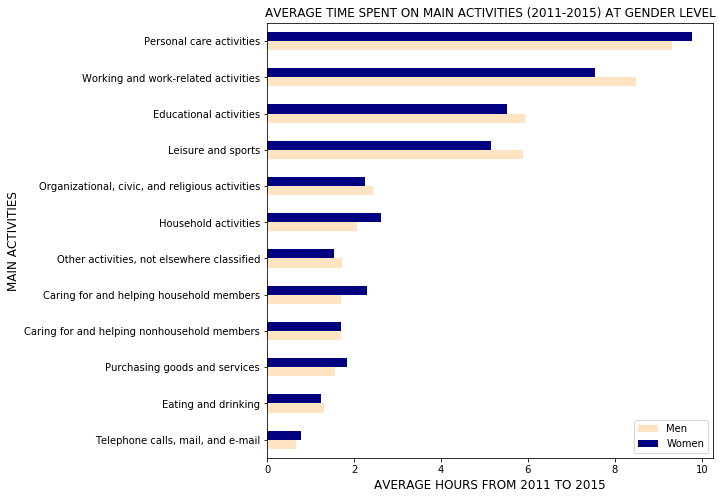

In [82]:
# Plotting the Main Activity data as per the Average time

colortemp = [colors[x] for x in list(range(2,4))]
df_main_final = df_main_final.set_index(['Main_Activity'])
ax = df_main_final[['AvgHrsMenMain','AvgHrsWomenMain']].plot(kind='barh', title ="AVERAGE TIME SPENT ON MAIN ACTIVITIES (2011-2015) AT GENDER LEVEL", figsize=(8,8), legend=True, fontsize=10, color = colortemp )
ax.set_xlabel("AVERAGE HOURS FROM 2011 TO 2015", fontsize=12)
ax.set_ylabel("MAIN ACTIVITIES", fontsize=12)
L=plt.legend(loc = 'lower right')
L.get_texts()[0].set_text('Men')
L.get_texts()[1].set_text('Women')
plt.show()

**From the visualization above, we see that majority of the Americans (both genders) tend to spend most time on the following activities on an average:**

+ Personal Care Activities
+ Working and Work related Activities
+ Educational Activities
+ Leisure and Sports

As the above visualization provides an idea regarding the top activities, we wanted to see this at a yearly level to further highlight the significance of these activities. By understanding the trends over the years, we can forecast as to which activities will pose relevance in future as well.

##  4.2 | Visualizing trends for main activities through years 2011-2015

We can see the fluctuations in average hours per activity through each year from 2011 to 2015 for men and women. It is important to note these changes in trends to channelize advertisements/promotions in the right category for maximized results in the future as well (aiming for forecasting predictions). 

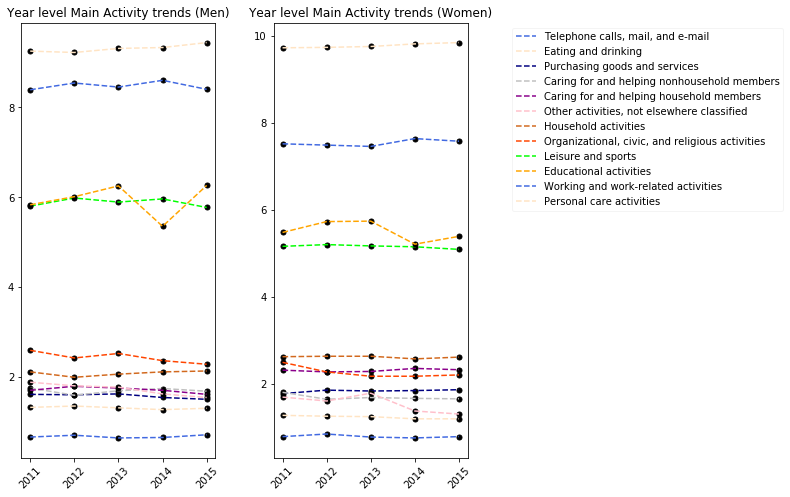

In [83]:
# Plotting the view for main activities at yearly level

df_men = df_main_final.filter(regex="Men+",axis=1)
df_women = df_main_final.filter(regex="Women+",axis=1)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,8))

# Creating a loop so that yearly data can be mapped

i = 0
for Activity in list(df_men.index):
    ax[0].plot(df_men.loc[Activity].tolist()[:-1],"ko",markersize=5)
    ax[0].plot(df_men.loc[Activity].tolist()[:-1],linestyle='dashed',label=Activity,color=colors[i+1])
    ax[1].plot(df_women.loc[Activity].tolist()[:-1],"ko",markersize=5)
    ax[1].plot(df_women.loc[Activity].tolist()[:-1],linestyle='dashed',label=Activity,color=colors[i+1])
    if i>=9:
        i=0
    else:
        i+=1
ax[0].legend(loc="upper left", fontsize=10,framealpha=0.2,bbox_to_anchor=(2.5, 1))
fig.subplots_adjust(wspace=0.3, hspace=0)
ax[0].set_title("Year level Main Activity trends (Men)")
ax[1].set_title("Year level Main Activity trends (Women)")

ax[0].set_xticks(list(range(0,5)))
ax[0].set_xticklabels(list(range(2011,2016)))
ax[1].set_xticks(list(range(0,5)))
ax[1].set_xticklabels(list(range(2011,2016)))

xaxis1 = ax[0].get_xaxis()
xaxis2 = ax[1].get_xaxis()

for ticks1,ticks2 in zip(xaxis1.get_ticklabels(),xaxis2.get_ticklabels()):
    ticks1.set_rotation(45)
    ticks1.set_color('k')
    ticks2.set_rotation(45)
    ticks2.set_color('k')

plt.show()

We observe from the yearly trends that - 
+ Time spent by both the genders has been gradually increasing from 2011 to 2015. This illustrates that a large emphasis is placed by individuals on personal care.
+ Trends corresponding to Educational activities show a dip in the year 2014 for both genders but it is seen that it is slowly picking up in the year 2015.
+ Overall, non-top 4 activities are consistent among their yearly trends which basically inidicates that higher emphasis on the same may not be extremely beneficial.

## 4.3 | Which activity is the primary focus for each gender? 

** From the below visualization we see the Gender breakdown for some of the key primary activities. **

This further provides an idea about which activity is of higher focus for each gender so that gender-localized targeting strategy can be developed.

+ We clearly notice that though relatively the amount of time spent is in almost the same bracket for most of the activities, women tend to invest more time in house-hold activities. 
+ Men tend to spend more time indulging in leisure activities
+ The derivations above correlates with the normal convention of gender norms as well. Though we are seeing both genders involved in work related activies too, this disparity of activities is still distinct.

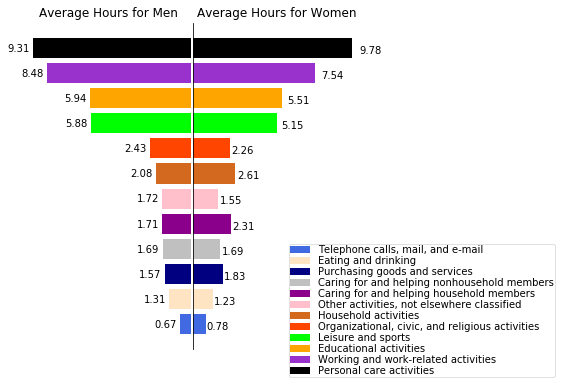

In [84]:
# Creating the visualization to distinctly identify important activies for each gender

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6,6))
locx = list(range(0,10))
barwidth = 0.35
for loc, Activity in zip(range(len(df_men)),list(df_men.index)):
    bar1, = ax[0].barh(loc,round(df_men.loc[Activity]["AvgHrsMenMain"],2),label=Activity,color = colors[loc+1])
    ax[0].text(bar1.get_width()+1.5,bar1.get_y()+barwidth/2,bar1.get_width(),ha='left', va='bottom')
    bar2, = ax[1].barh(loc,round(df_women.loc[Activity]["AvgHrsWomenMain"],2),label=Activity,color = colors[loc+1])
    ax[1].text(bar2.get_width()*1.05,bar2.get_y()+barwidth/2,bar2.get_width())
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)

ax[0].invert_xaxis()                        #this invert provides the opposite comparison graphs between genders
ax[0].set_title("Average Hours for Men")
ax[1].set_title("Average Hours for Women")
box1 = ax[0].get_position()
box2 = ax[1].get_position()
fig.subplots_adjust(wspace=0.01, hspace=0)
l = ax[1].legend(loc="lower right", fontsize=10,framealpha=0.6, markerscale=5,labelspacing=0.1,borderpad=0.1
                 ,bbox_to_anchor=(2.2, -.1))
plt.show()

## 4.4 | Does age play any role in the time spent on activities?

** Follwing the understanding from the gender level analysis, we wanted to add another layer of analysis by viewing this data based on the age group demographic.** 

From the below stacked visualization we see the age-group breakdown for some of the key primary activities. As expected, sleeping takes the cake followed by Leisure and Sports. This further ties to the on-going analysis where it is best to cater to all age groups via TV or Internet or Social Media. Knowing that this platform is highly effective, it is extremely sensible to invest thoroughly in this domain and effectively grow the sales.

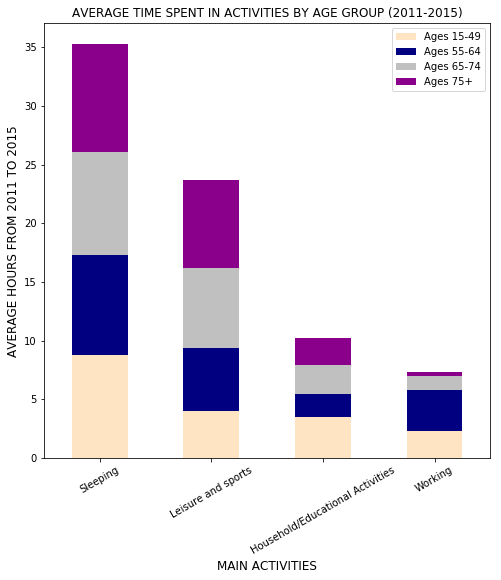

In [85]:
# Plotting the stacked bar chart for each age bracket

df_age_data = df_age_data.sort_values('Ages 15-49', ascending=False)
colortemp = [colors[x] for x in list(range(2,6))]
ax = df_age_data[['Ages 15-49','Ages 55-64', 'Ages 65-74', 'Ages 75+']].plot(kind='bar', stacked = True, color = colortemp,title ="AVERAGE TIME SPENT IN ACTIVITIES BY AGE GROUP (2011-2015)", figsize=(8, 8), legend=True, fontsize=10,rot=30)
ax.set_xlabel("MAIN ACTIVITIES", fontsize=12)
ax.set_ylabel("AVERAGE HOURS FROM 2011 TO 2015", fontsize=12)
plt.show()

## 4.5 | Deep-Diving and visualizing data at sub-activity level for the top 4 main activities

From all of the above visualizations, we can concretely see that few of the primary activities really stand out. Knowing this, we wanted to further delve into the data to decipher which sub-activities (within the above mentioned top 4 main activities) do Americans perform most. This granular analysis of the data will provide a deeper insight to more locally target the relevant customer base.

We created main activity level segments to organize so that we can correlate easily.

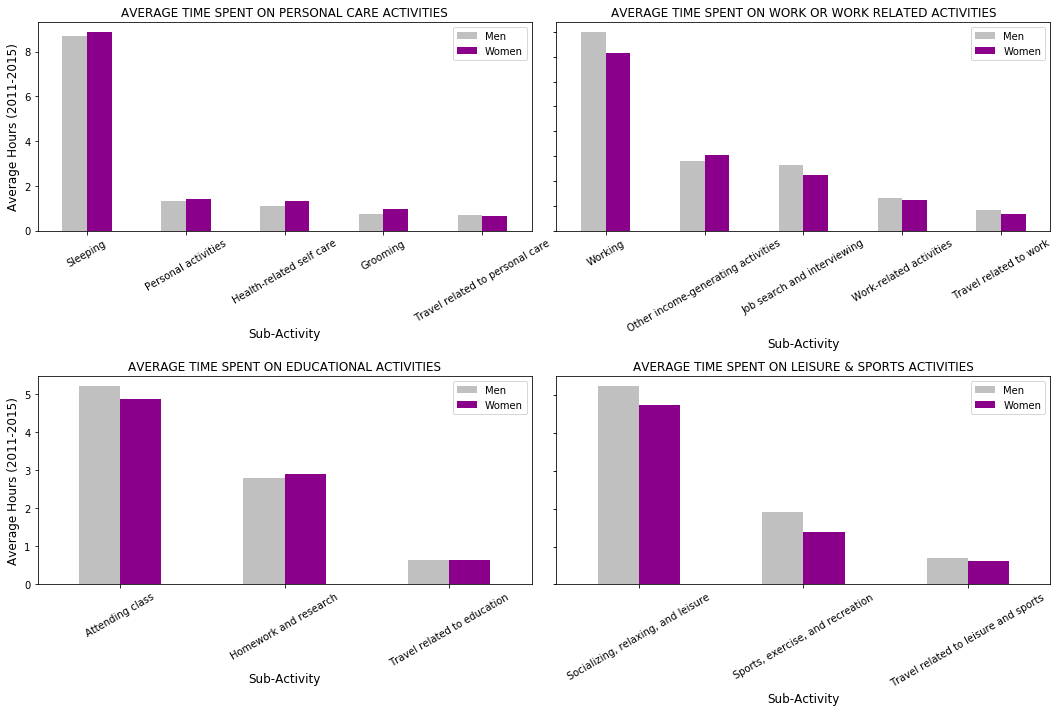

In [86]:
# Filtering out the sub-activities of the Top 4 main activities

top_list = ['Sleeping', 'Grooming', 'Health-related self care', 'Personal activities', 'Travel related to personal care', 'Working',
            'Work-related activities', 'Other income-generating activities', 'Job search and interviewing', 'Travel related to work',
            'Attending class', 'Homework and research', 'Travel related to education', 'Socializing, relaxing, and leisure', 
            'Sports, exercise, and recreation', 'Travel related to leisure and sports']

df_sub_final_u = df_sub_final[df_sub_final['Sub_Activity'].isin(top_list)]
df_sub_final_u = df_sub_final_u.reset_index()

# Merging the sub-activity data with main activity to create categories/segements

data = {'Main_Activity': ['Personal care activities', 'Personal care activities', 'Personal care activities','Personal care activities','Personal care activities', 'Working and work-related activities', 'Working and work-related activities','Working and work-related activities', 'Working and work-related activities', 'Working and work-related activities',
'Educational activities', 'Educational activities', 'Educational activities', 'Leisure and sports', 'Leisure and sports', 'Leisure and sports']}  
df_main_act = pd.DataFrame(data)

df_sub_final_q = pd.merge(df_sub_final_u, df_main_act, left_index=True, right_index=True)
df_sub_final_q.drop('index', axis=1, inplace=True)

# Cleaning and sorting the data 

df_sub_final_Personal_Care = df_sub_final_q.groupby(['Main_Activity']).get_group('Personal care activities')
df_sub_final_Personal_Care = df_sub_final_Personal_Care.set_index(['Sub_Activity'])
df_sub_final_Personal_Care = df_sub_final_Personal_Care.sort_values('AvgHrsMenSub', ascending=False)

df_sub_final_Educational = df_sub_final_q.groupby(['Main_Activity']).get_group('Educational activities')
df_sub_final_Educational = df_sub_final_Educational.set_index(['Sub_Activity'])
df_sub_final_Educational = df_sub_final_Educational.sort_values('AvgHrsMenSub', ascending=False)

df_sub_final_Leisure_Sports = df_sub_final_q.groupby(['Main_Activity']).get_group('Leisure and sports')
df_sub_final_Leisure_Sports = df_sub_final_Leisure_Sports.set_index(['Sub_Activity'])
df_sub_final_Leisure_Sports = df_sub_final_Leisure_Sports.sort_values('AvgHrsMenSub', ascending=False)

df_sub_final_Work = df_sub_final_q.groupby(['Main_Activity']).get_group('Working and work-related activities')
df_sub_final_Work = df_sub_final_Work.set_index(['Sub_Activity'])
df_sub_final_Work = df_sub_final_Work.sort_values('AvgHrsMenSub', ascending=False)

# Plotting the graph at sub-activity level

fig, ax = plt.subplots(nrows=2, ncols=2)
colortemp = [colors[x] for x in list(range(4,6))]
df_sub_final_Personal_Care[['AvgHrsMenSub','AvgHrsWomenSub']].plot(kind='bar', ax=ax[0,0], color = colortemp, width=0.5, title ="AVERAGE TIME SPENT ON PERSONAL CARE ACTIVITIES", figsize=(15, 10), legend=True,fontsize=10, rot = 30)
df_sub_final_Work[['AvgHrsMenSub','AvgHrsWomenSub']].plot(kind='bar', ax=ax[0,1], color = colortemp, width=0.5, title ="AVERAGE TIME SPENT ON WORK OR WORK RELATED ACTIVITIES", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[0,0],rot = 30 )
df_sub_final_Educational[['AvgHrsMenSub','AvgHrsWomenSub']].plot(kind='bar', ax=ax[1,0],color = colortemp, width=0.5, title ="AVERAGE TIME SPENT ON EDUCATIONAL ACTIVITIES", figsize=(15, 10), legend=True, fontsize=10,rot = 30 )
df_sub_final_Leisure_Sports[['AvgHrsMenSub','AvgHrsWomenSub']].plot(kind='bar', ax=ax[1,1],color = colortemp, width=0.5, title ="AVERAGE TIME SPENT ON LEISURE & SPORTS ACTIVITIES", figsize=(15, 10), legend=True, fontsize=10,sharey=ax[1,0],rot = 30)

# Setting the Legend and Axis Labels

L1 = ax[0,0].legend(loc = 'upper right')
L1.get_texts()[0].set_text('Men')
L1.get_texts()[1].set_text('Women')

L2 = ax[0,1].legend(loc = 'upper right')
L2.get_texts()[0].set_text('Men')
L2.get_texts()[1].set_text('Women')

L3 = ax[1,0].legend(loc = 'upper right')
L3.get_texts()[0].set_text('Men')
L3.get_texts()[1].set_text('Women')

L4 = ax[1,1].legend(loc = 'upper right')
L4.get_texts()[0].set_text('Men')
L4.get_texts()[1].set_text('Women')

ax[0,0].set_ylabel('Average Hours (2011-2015)', fontsize=12)
ax[0,1].set_ylabel('Average Hours (2011-2015)', fontsize=12)
ax[1,0].set_ylabel('Average Hours (2011-2015)', fontsize=12)
ax[1,1].set_ylabel('Average Hours (2011-2015)', fontsize=12)
ax[0,0].set_xlabel('Sub-Activity', fontsize=12)
ax[0,1].set_xlabel('Sub-Activity', fontsize=12)
ax[1,0].set_xlabel('Sub-Activity', fontsize=12)
ax[1,1].set_xlabel('Sub-Activity', fontsize=12)
fig.tight_layout()                                          # aligns all 4 charts within subplots 
fig.subplots_adjust(wspace=0.05, hspace=0.7)

** We see that majority of the time is spent on either sleeping or working followed by attending class (target student crowd) or socializing, relaxing, and leisure.** 

All of these activities provide a profitable platform to advertise for a certain segment of population and develop a sales strategy. 

+ For instance, since Americans spend an ample amount of time sleeping/resting or working, this could be leveraged such that the potential customer base is rightfully tapped based on the product. 

+ Likewise, products catering to students and teens can be branded and publicized in and around academic and college campuses to generate maximum revenue.

As we see from the plot above, socializing, relaxing, and leisure is also a primary activity with potential for convenient targeting. We wanted to further look into this category to clearly pin-point the modes by which advertising would be most effective.

## 4.6 | Leisure Activity Breakdown

**From the below pie chart, we see that most of the time is consumed in:**
+ **Watching TV** 
+ **Socializing and Communicating**
+ **Playing Games; Using Computer for Leisure**
+ **Sports, exercise, and recreation**

With the above insight into the type of leisure activities, we see that TV and Internet could pose to be very strategic platforms for exploiting a potential audience.

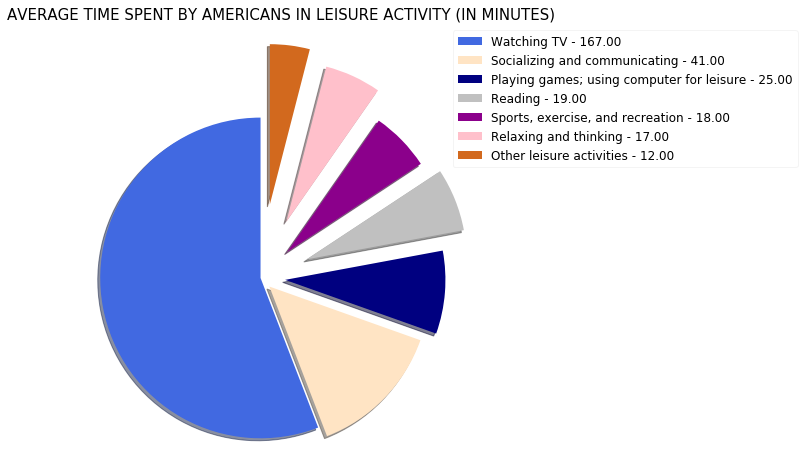

In [87]:
# Creating the exploded pie chart

fig, ax = plt.subplots(figsize=(8, 8))
explode = [0,0.1,0.2,.4,0.3,0.5,0.6]                                 
color = [colors[x] for x in list(range(1,len(df_leisure_all["Minutes"])+1))]
p,t = ax.pie(list(df_leisure_all["Minutes"]), explode=explode,shadow=True, startangle=90, radius=1.3,colors=color)
labels = ['{0} - {1:1.2f}'.format(i,j) for i,j in zip(list(df_leisure_all.index), list(df_leisure_all["Minutes"]))]
box1 = ax.get_position()
ax.set_position([box1.x0, box1.y0, box1.width * 0.9, box1.height])
l = ax.legend(p,labels , loc="upper right", fontsize=12,framealpha=0.2,bbox_to_anchor=(1.8, 1))
l.get_title().set_position((30, 0))

# Equal aspect ratio ensures that pie is drawn as a circle

ax.axis('equal')                                                     
ax.set_title("AVERAGE TIME SPENT BY AMERICANS IN LEISURE ACTIVITY (IN MINUTES)",fontsize=15)
plt.show()

## 4.7 | Visualizing time spent on Sports & Leisure activities at a geographic level

** From the below geographic distribution, we see the regions within United States of America with maximum interest in sports related activities **

+ Northern USA is more inclined towards sports activities with Alaska, Montana, and Wyoming leading the race
+ Southern USA is not very active in this particular domain

In [88]:
# Geographic Distribution of Sports and Leisure Activities

for col in df_geo_sports.columns:
    df_geo_sports[col] = df_geo_sports[col].astype(str)
#shows color gradient as hours increases
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
       [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_geo_sports['text'] = df_geo_sports['State']
layout = dict(
        title = 'Average Time spent on Sports & Leisure (in hours) <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_geo_sports['code'],                      # picks 2 digit state code from csv
        z = df_geo_sports['Hours'].astype(float),               # picks activity hrs as float
        locationmode = 'USA-states',
        text = df_geo_sports['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Time in Hours")                         
        ) ]
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

## 4.8 | Ad-Hoc Analysis: Time spent on Organizational, Civic, and Religious activities at a geographic level

** We were curious to see if religion and the corresponding activities are very popular among Americans.**

We notice that religion is more strictly adhered to in the south-eastern part of the country. According to this ad-hoc analysis, the type of mentality and mind-set can also be worked into developing lucrative business strategies.

In [90]:
# Geographic Distribution of Religious and Civic Organization Activities

for col in df_geo_religion.columns:
    df_geo_religion[col] = df_geo_religion[col].astype(str)
#shows color gradient as hours increases
scl = [[0.0, 'rgb(243,205,174)'],[0.3, 'rgb(237,184,140)'],[0.6, 'rgb(227,142,72)'],\
            [0.9, 'rgb(72,39,11)'],[1.0, 'rgb(38,20,6)']]

df_geo_religion['text'] = df_geo_religion['State']  
layout = dict(
        title = 'Average time spent on Organizational, Civic & Religious Activities (in hours) <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_geo_religion['code'],               # picks 2digit state code from csv
        z = df_geo_religion['Hours'].astype(float),        # picks activity hrs as float
        locationmode = 'USA-states',
        text = df_geo_religion['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Time in Hours")
        ) ]
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

# 5 | Conclusion

After looking at serveral visualizations and analyzing the data, we see that most of the time spent by Americans is on the following activities (order: highest time to lowest time) :  

+ Personal Care
+ Work-related
+ Educational
+ Leisure and Sports

It is seen that age also plays a major role in determining the type of activities Americans indulge in as well. For instance, folks within the age group of 15-49 tend to be more involved in educational or work activities. In order to target such individuals, the strategies should be focused around work or academic zones as this would lead to maximum impact. 

Further, all age groups indulge in a bit of leisure time. It is seen that a bit more than 50% of this leisure time is spent on television which indicates that it is the most lucrative bet for promotional and marketing activities of any type of products. Ofcourse, a further analysis into understanding the demographics of the audience that watches the television at different times of the day would provide a deeper insight into understanding the type of commericals and products that should be marketed. 

Finally, looking at the data from a geographic point of view, we observed that the mid-west part of the United States is relatively oriented towards leisure/sports activities relative to the rest of the country. The kind of details would add great value in further understanding the habits that Americans have and ultimately develop an effective sales strategy. 